In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from IPython.display import Audio
import librosa
import librosa.display

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
data_dir = '/content/Savee.zip'

In [5]:
import zipfile
import os

# Assuming your zip file is in '/content/Savee.zip'
zip_file_path = '/content/Savee.zip'
extract_dir = '/content/Savee'  # Choose your desired extraction directory

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Update the data_dir variable to point to the extracted directory
data_dir = extract_dir

# Now, the rest of your code should work
features = []
labels = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        emotion_label = folder.split('_')[-1]  # Extract the emotion label from the folder name

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_path.endswith('.wav'):
                # Load the audio file and extract features
                audio, sr = librosa.load(file_path, duration=3)  # Adjust the duration as needed
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc, axis=1)
                features.append(mfcc_mean)
                labels.append(emotion_label)

In [6]:
features = np.array(features)
labels = np.array(labels)

In [7]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [8]:
# Define the emotions and the number of samples to select from each emotion
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
num_samples_per_emotion = 3
# Initialize empty lists for storing the selected samples
selected_samples = []

In [9]:
import zipfile
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming your zip file is in '/content/Savee.zip'
zip_file_path = '/content/Savee.zip'
extract_dir = '/content/Savee'  # Choose your desired extraction directory

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Update the data_dir variable to point to the extracted directory
data_dir = extract_dir

# Now, the rest of your code should work
features = []
labels = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        # Assuming emotion label is the last part of the folder name,
        # but adapt this based on your actual folder structure
        emotion_label = folder.split('_')[-1]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_path.endswith('.wav'):
                # Load the audio file and extract features
                audio, sr = librosa.load(file_path, duration=3)  # Adjust the duration as needed
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc, axis=1)
                features.append(mfcc_mean)
                labels.append(emotion_label)

features = np.array(features)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Define the emotions based on the actual folder names
# Adjust 'emotions' list to match the folder structure
# Example: emotions = ['DC', 'JE', 'JK', 'KL'] # Replace with actual folder names
emotions = [folder.split('_')[0] for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

num_samples_per_emotion = 3

# Initialize empty lists for storing the selected samples
selected_samples = []

# Iterate through the emotions and select samples
for emotion in emotions:
    # Construct the emotion directory path based on your actual folder structure
    emotion_dir = os.path.join(data_dir, f'{emotion}')  # Modified to match actual folder structure

    if os.path.exists(emotion_dir):  # Check if the directory exists
        audio_files = os.listdir(emotion_dir)
        selected_files = np.random.choice(audio_files, size=num_samples_per_emotion, replace=False)

        for file_name in selected_files:
            file_path = os.path.join(emotion_dir, file_name)
            audio, sr = librosa.load(file_path, duration=3)
            selected_samples.append((audio, sr, emotion))
    else:
        print(f"Warning: Emotion directory not found: {emotion_dir}")  # Print a warning if directory not found

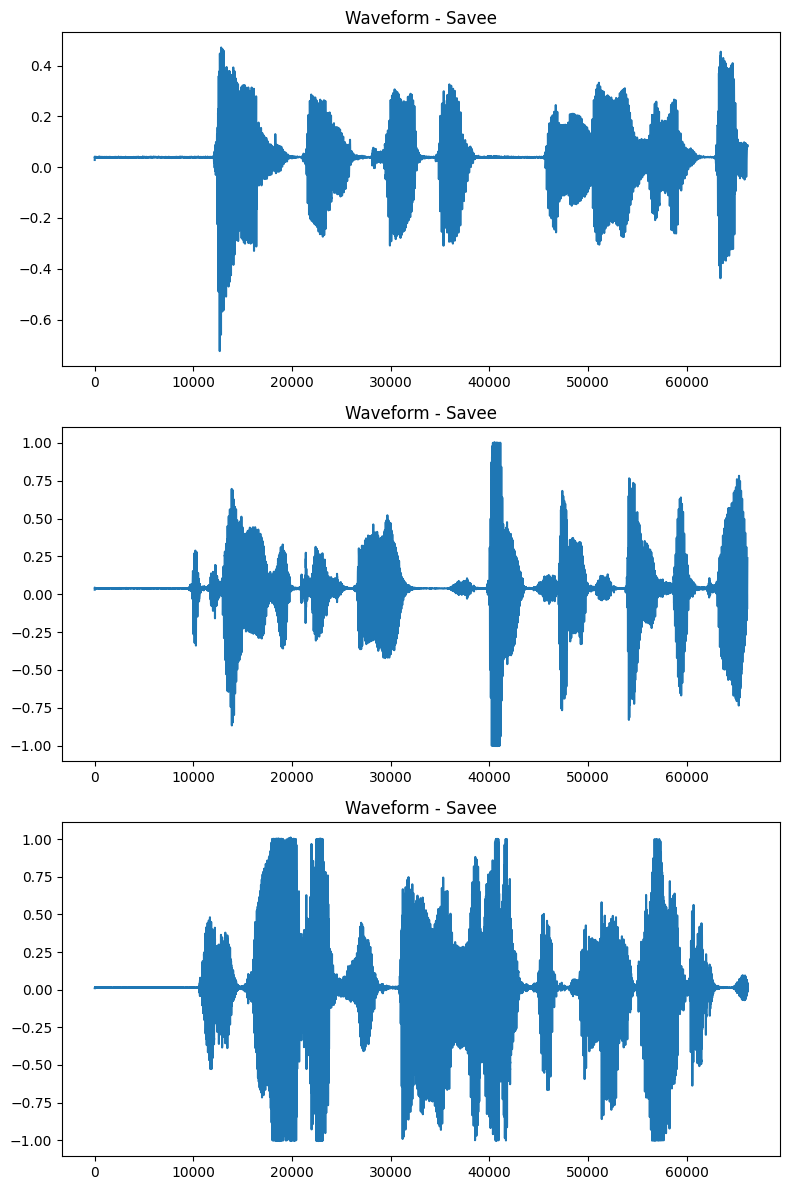

In [10]:

# Plot the selected samples
num_samples = len(selected_samples)
plt.figure(figsize=(8, 4 * num_samples))

for i, (audio, sr, emotion) in enumerate(selected_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(audio)
    plt.title(f'Waveform - {emotion}')

plt.tight_layout()
plt.show()


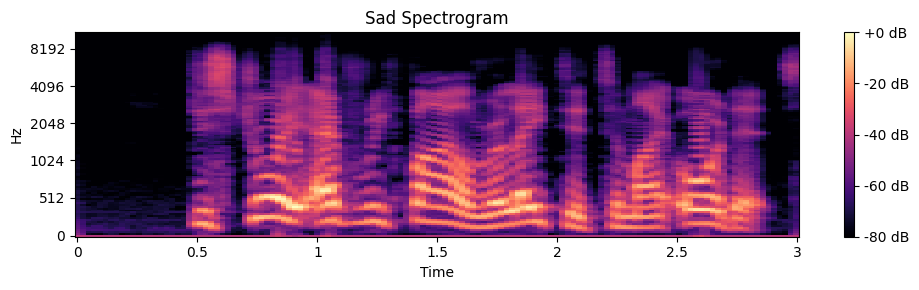

In [11]:
# Calculate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

# Convert power spectrogram to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Sad Spectrogram')
plt.tight_layout()
plt.show()
Audio(file_path)

In [12]:
# Apply audio transformations (e.g., noise addition, time stretching, pitch shifting)
augmented_features = []
augmented_labels = []

for feature, label in zip(features, labels):
    augmented_features.append(feature)
    augmented_labels.append(label)

    # Apply noise addition
    noise = np.random.randn(len(feature))
    augmented_features.append(feature + 0.005 * noise)  # Adjust the noise magnitude as needed
    augmented_labels.append(label)

    # Apply time stretching
    # Reshape time_stretch output to match original feature shape
    stretched_feature = librosa.effects.time_stretch(feature, rate=1.2)
    # Pad or trim the stretched feature to match the original feature length
    stretched_feature = np.pad(stretched_feature, (0, len(feature) - len(stretched_feature)), 'constant')[:len(feature)]

    augmented_features.append(stretched_feature)
    augmented_labels.append(label)

    # Apply pitch shifting (Assuming the pitch function is defined elsewhere)
    # pitched_feature = pitch(feature, sr, pitch_factor=0.7)
    # pitched_feature = pitched_feature[:feature.shape[0]]  # Trim or pad to original length
    # augmented_features.append(pitched_feature)
    # augmented_labels.append(label)

# Convert the augmented lists to NumPy arrays
augmented_features = np.array(augmented_features)
augmented_labels = np.array(augmented_labels)

# Print the number of original and augmented samples
print('Original samples:', len(features))
print('Augmented samples:', len(augmented_features))

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(


Original samples: 480
Augmented samples: 1440


In [13]:
# Define a list to store the preprocessed data
preprocessed_data = []
file_list = os.listdir(data_dir)
# Iterate over the files
for filename in file_list:
    file_path = os.path.join(data_dir, filename)

    # Skip non-audio files
    if not filename.endswith('.wav'):
        continue

    # Load the audio file and obtain the waveform and sample rate
    waveform, sr = librosa.load(file_path, sr=None, dtype=np.float32)

    # Resample the audio if needed
    if sr != 22050:
        waveform = librosa.resample(waveform, sr, 22050)
        sr = 22050


In [14]:
# Encode the emotion labels
label_mapping = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
encoded_labels = np.array([label_mapping.get(label, -1) for label in labels])

# Filter out any samples with unknown emotion labels
valid_indices = np.where(encoded_labels != 1)[0]  # Get the indices from the tuple
features = features[valid_indices]
encoded_labels = encoded_labels[valid_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Reshape the input features
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))


# Convert the emotion labels to categorical format
num_classes = len(label_mapping)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (384, 13, 1)
y_train shape: (384, 6)
X_test shape: (96, 13, 1)
y_test shape: (96, 6)


In [16]:
#Build the cnn model architeture
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(13, 1, 1), padding='same'))

# Flatten the output
model.add(Flatten())

# Add a dense layer0
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 1, 32)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 416)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          13,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,862 (54.15 KB)

 Trainable params: 13,862 (54.15 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8423 - loss: 0.2547 - val_accuracy: 1.0000 - val_loss: 5.5318e-06
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 2.1069e-06 - val_accuracy: 1.0000 - val_loss: 1.3411e-07
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 9.2263e-08 - val_accuracy: 1.0000 - val_loss: 2.3594e-08
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.6192e-08 - val_accuracy: 1.0000 - val_loss: 8.6923e-09
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 7.5615e-09 - val_accuracy: 1.0000 - val_loss: 3.7253e-09
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 4.1910e-09 - val_accuracy: 1.0000 - val_loss: 3.7253e-09
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 3.7918e-09 - val_accuracy: 1.0000 - val_loss: 3.7253e-09
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - los

In [18]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.1731e-09 
Accuracy of our model on test data :  100.0 %


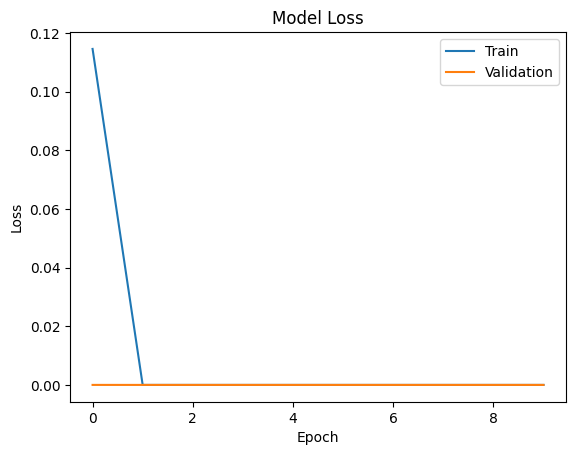

In [19]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

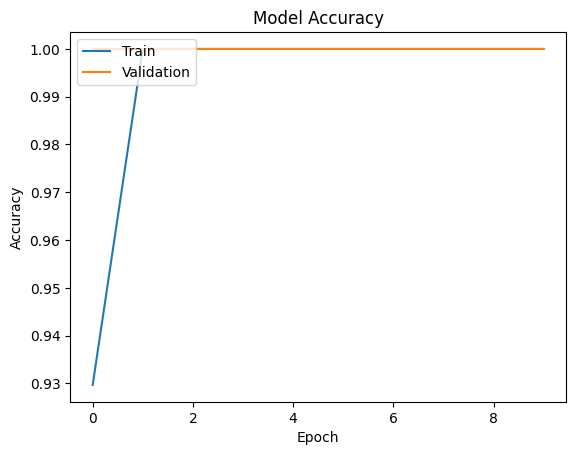

In [20]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-s

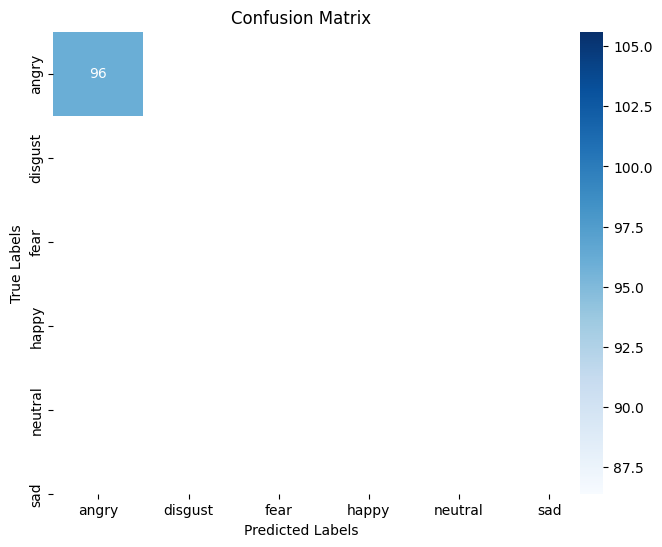

In [21]:
# Get the predicted labels for the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to labels

# Convert the true labels from one-hot encoding to labels
y_true_labels = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']  # Replace with your actual class names
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names, labels=range(len(class_names)))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
# Predict using the trained model
y_pred_single = model.predict(X_test)

# Convert predictions to class labels
y_pred_label = np.argmax(y_pred, axis=1)

# Class names for interpretation
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
predicted_class = class_names[y_pred_label[0]]
print(f'Predicted class: {predicted_class}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicted class: sad


In [22]:
 print(report)

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
     disgust       0.00      0.00      0.00         0
        fear       0.00      0.00      0.00         0
       happy       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
         sad       1.00      1.00      1.00        96

    accuracy                           1.00        96
   macro avg       0.17      0.17      0.17        96
weighted avg       1.00      1.00      1.00        96



In [23]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=64)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 4.4786e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 3.6508e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 2.8229e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 2.8229e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 2.8747e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 3.5990e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 4.1682e-09 - val_accuracy: 1.0000 - val_loss: 1.0277e-09
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - 

In [24]:
print("Accuracy of our model on train data : " , model.evaluate(X_train,y_train)[1]*100 , "%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4367e-09 
Accuracy of our model on train data :  100.0 %


In [36]:
def load_audio_file(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Preprocess audio (e.g., extract features)
    # Example: Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Ensure the shape matches what your model expects
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    return mfccs

# Example usage
file_path = '/content/JE_f12.wav'
X_test_single = load_audio_file(file_path)

In [38]:
      def load_audio_file(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Preprocess audio (e.g., extract features)
    # Example: Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Reshape to 2D array for the model
    mfccs = mfccs.reshape(1, -1)  # Reshape to (1, num_features)

    return mfccs

# Example usage
file_path = '/content/JE_f12.wav'
X_test_single = load_audio_file(file_path)

In [41]:
import numpy as np
import librosa

def load_audio_file(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Preprocess audio (e.g., extract features)
    # Example: Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Reshape to 3D array for the model
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension

    return mfccs

# Example usage
file_path = '/content/JE_f12.wav'
X_test_single = load_audio_file(file_path)

In [59]:
import numpy as np
import librosa

# Function to load and preprocess the audio file
def load_audio_file(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    return mfccs

# Specify your audio file path
file_path = '/content/JE_f12.wav'
X_test_single = load_audio_file(file_path)

# Print the original shape
print("Original shape of X_test_single:", X_test_single.shape)

# Check and adjust shape if necessary
if len(X_test_single.shape) == 2:  # If it's missing batch dimension
    X_test_single = np.expand_dims(X_test_single, axis=0)  # Add batch dimension

# Print adjusted shape
print("Adjusted shape of X_test_single:", X_test_single.shape)

# Predict using the trained model
try:
    y_pred_single = model.predict(X_test_single)
except Exception as e:
    print("Error during prediction:", e)

# Convert predictions to class labels if prediction is successful
if 'y_pred_single' in locals():
    y_pred_label = np.argmax(y_pred_single, axis=1)

    # Class names for interpretation
    class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
    predicted_class = class_names[y_pred_label[0]]
    print(f'Predicted class: {predicted_class}')

Original shape of X_test_single: (1, 13, 442)
Adjusted shape of X_test_single: (1, 13, 442)
Error during prediction: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/loca

In [60]:
import numpy as np
import librosa

# Function to load and preprocess the audio file
def load_audio_file(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    return mfccs

# Specify your audio file path
file_path = '/content/JE_f12.wav'
X_test_single = load_audio_file(file_path)

# Print original shape
print("Original shape of X_test_single:", X_test_single.shape)

# Check and adjust shape if necessary
if len(X_test_single.shape) == 2:  # If it's missing batch dimension
    X_test_single = np.expand_dims(X_test_single, axis=0)  # Add batch dimension

# Print adjusted shape
print("Adjusted shape of X_test_single:", X_test_single.shape)

# Predict using the trained model
try:
    y_pred_single = model.predict(X_test_single)
    print("Prediction successful.")
except Exception as e:
    print("Error during prediction:", e)

# Convert predictions to class labels if prediction is successful
if 'y_pred_single' in locals():
    y_pred_label = np.argmax(y_pred_single, axis=1)

    # Class names for interpretation
    class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
    predicted_class = class_names[y_pred_label[0]]
    print(f'Predicted class: {predicted_class}')

Original shape of X_test_single: (1, 13, 442)
Adjusted shape of X_test_single: (1, 13, 442)
Error during prediction: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/loca